In [160]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm

import numpy as np

In [216]:

data = pd.read_csv('./Data/eskom_data.csv')
data = pd.DataFrame(data)

data

,Date Time Hour Beginning,Residual Forecast,RSA Contracted Forecast,International Exports,International Imports,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,...,Eskom Gas SCO,Eskom OCGT SCO,Hydro Water SCO,Pumped Water SCO Pumping,Wind,PV,CSP,Other RE,Total UCLF+OCLF,Non Comm Sentout
0,2019-04-01 12:00:00 AM,20126.707,21100.944,1220.728,919.0,19988.0,1845.0,0.0,0.0,0.0,...,-2.0,-1.730,0.0,-1713.0,746.888,0.000,0.000,12.890,11595,125.0
1,2019-04-01 01:00:00 AM,19822.447,20826.932,1195.998,834.0,19670.0,1845.0,0.0,0.0,0.0,...,-2.0,-1.730,0.0,-1797.0,937.058,0.000,0.000,13.055,11428,279.0
2,2019-04-01 02:00:00 AM,19726.316,20765.577,1183.745,765.0,19597.0,1845.0,0.0,0.0,0.0,...,-2.0,-1.730,0.0,-1790.0,982.304,0.000,0.000,13.462,11269,1.0
3,2019-04-01 03:00:00 AM,19938.506,21027.756,1156.881,739.0,19675.0,1845.0,0.0,0.0,0.0,...,-2.0,-1.600,0.0,-1779.0,980.428,0.000,0.000,12.930,11199,95.0
4,2019-04-01 04:00:00 AM,20794.305,21928.437,1212.353,926.0,19871.0,1845.0,0.0,0.0,0.0,...,-2.0,-1.730,0.0,-1482.0,1035.222,0.000,0.000,12.905,11198,393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33643,2023-01-31 07:00:00 PM,27782.200,30394.881,1515.623,1266.0,17566.0,923.0,0.0,891.0,602.0,...,-2.0,0.000,0.0,-20.0,1916.622,25.249,301.431,39.519,17887,253.0
33644,2023-01-31 08:00:00 PM,27039.007,29521.475,1401.416,1252.0,17317.5,923.0,0.0,817.0,601.0,...,-2.0,-1.733,0.0,-19.0,2044.470,0.876,275.869,32.775,18055,219.0
33645,2023-01-31 09:00:00 PM,24933.051,27196.188,1260.414,1285.0,17183.0,923.0,0.0,471.0,496.0,...,-2.0,-3.333,0.0,-421.0,1754.167,0.000,172.153,40.904,18236,749.0
33646,2023-01-31 10:00:00 PM,23084.044,24898.923,1215.882,1280.0,17101.0,923.0,0.0,368.0,333.0,...,-2.0,-3.599,0.0,-810.0,1362.100,0.000,94.807,39.957,18307,619.0


In [217]:
# Store estimated values elsewhere
mask = (data.iloc[:, 0] != 0) & data.iloc[:, 2:].isna().all(axis=1)

data = data[~mask] #remove estimated values

data.rename(columns={'Manual Load_Reduction(MLR)': 'MLR'}, inplace=True)


supply_columns = [
     'Thermal Generation',
    'Nuclear Generation', 'Eskom Gas Generation', 'Eskom OCGT Generation',
    'Hydro Water Generation', 'Pumped Water Generation', 'ILS Usage',
     'Eskom Gas SCO', 'Eskom OCGT SCO',
    'Hydro Water SCO', 'Pumped Water SCO Pumping', 'Wind', 'PV', 'CSP',
    'Other RE',
     'Non Comm Sentout', 'International Imports', 'MLR'
]

grid_health_columns = [
    'ILS Usage',
    'MLR', 'IOS Excl ILS and MLR',
     'Total UCLF+OCLF'
]

demand_columns = [
    'Residual Forecast', 'RSA Contracted Forecast', 'International Exports'
]

# Retrieve supply data into a new matrix
supply_data = data[supply_columns]

# Retrieve demand data into a new matrix
demand_data = data[demand_columns]


grid_health_data= data[grid_health_columns]

## Which power has largest generation

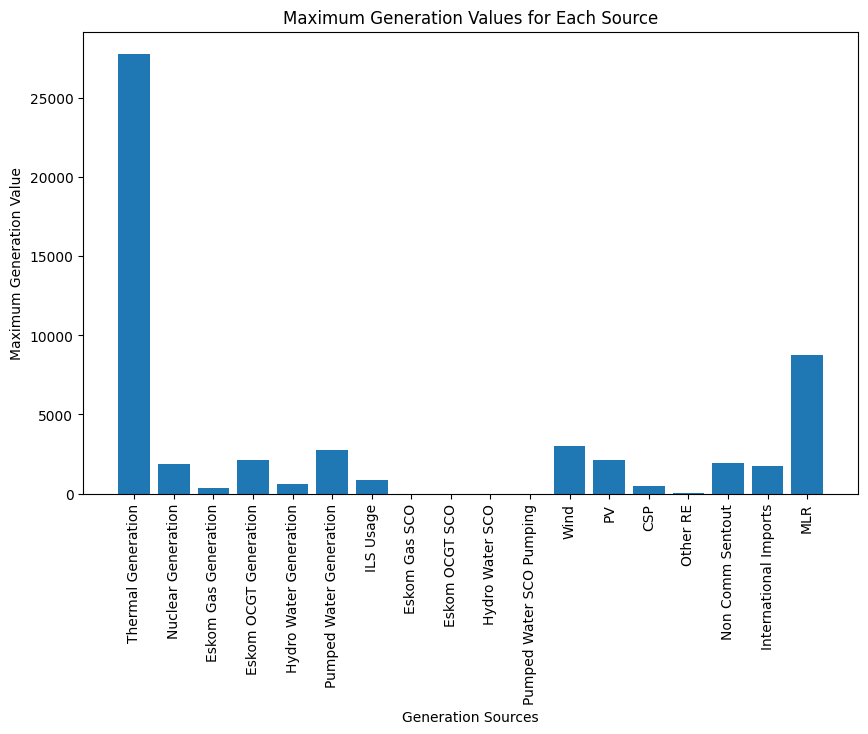

In [164]:

max_values = data[supply_columns].max()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(max_values.index, max_values.values)
plt.xlabel('Generation Sources')
plt.ylabel('Maximum Generation Value')
plt.title('Maximum Generation Values for Each Source')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.show()

### Rolling averages of the supply side

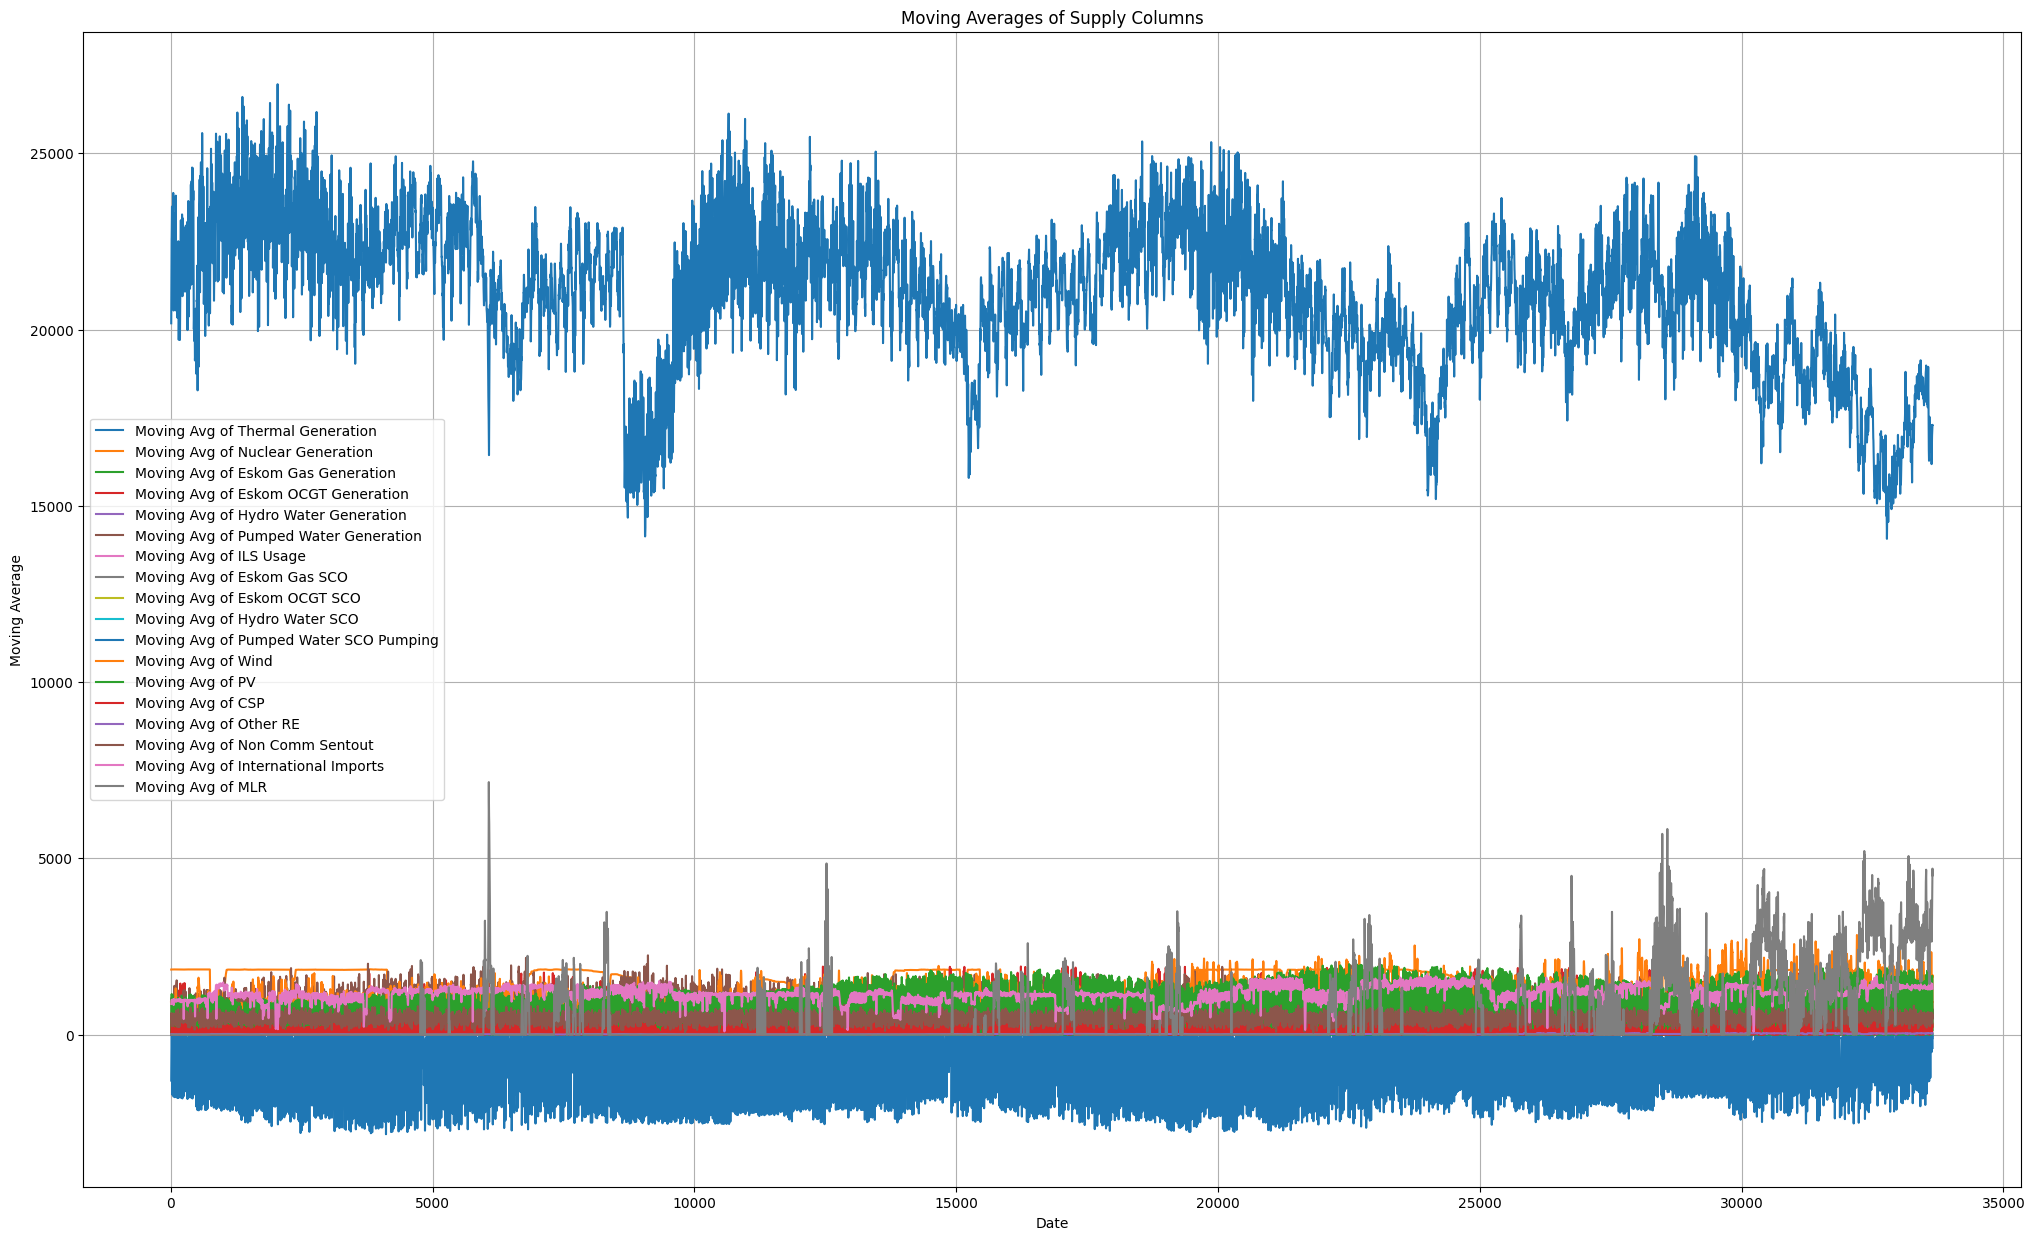

In [165]:
window_size = 7  # Adjust the window size as needed

# Calculate the moving averages for each supply column
moving_averages = supply_data[supply_columns].rolling(window=window_size).mean()

# Create a plot for each supply column
plt.figure(figsize=(25, 15))  # Adjust the figure size as needed

for column in supply_columns:
    plt.plot(supply_data.index, moving_averages[column], label=f'Moving Avg of {column}')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Supply Columns')
plt.legend()
plt.grid(True)

plt.show()

## Demand Analysing

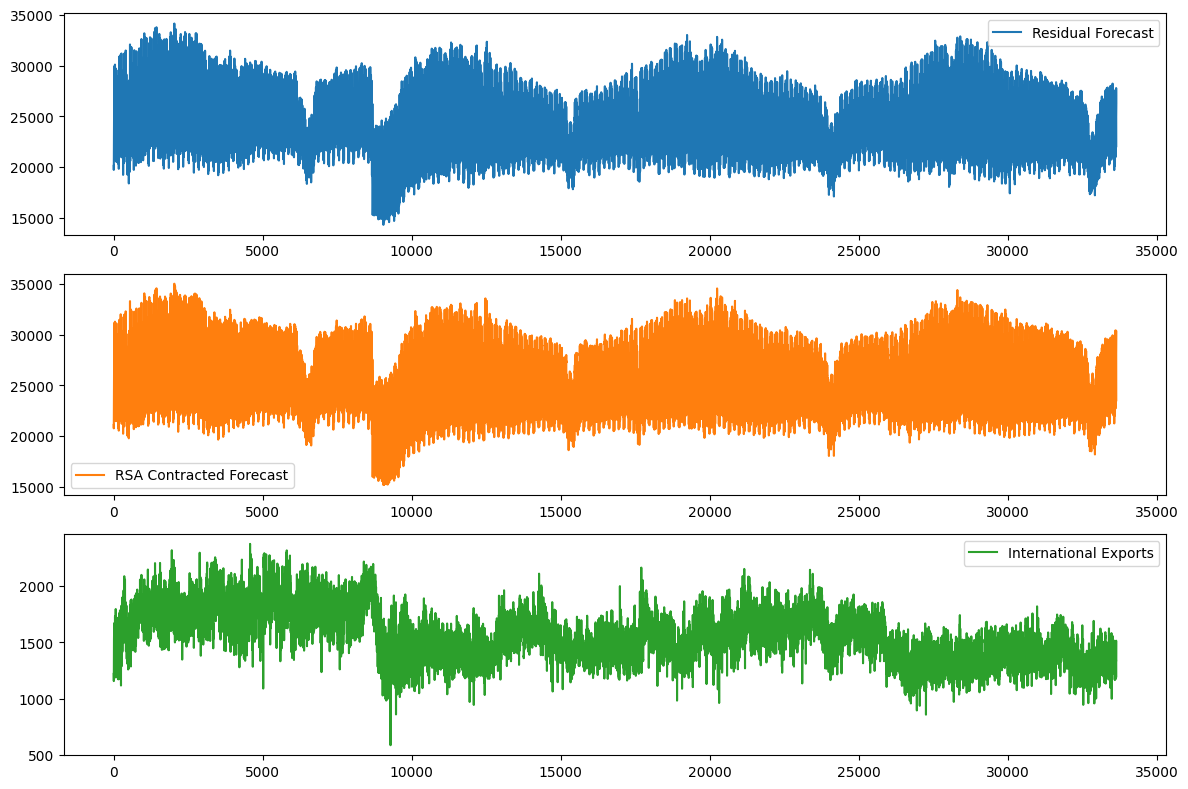

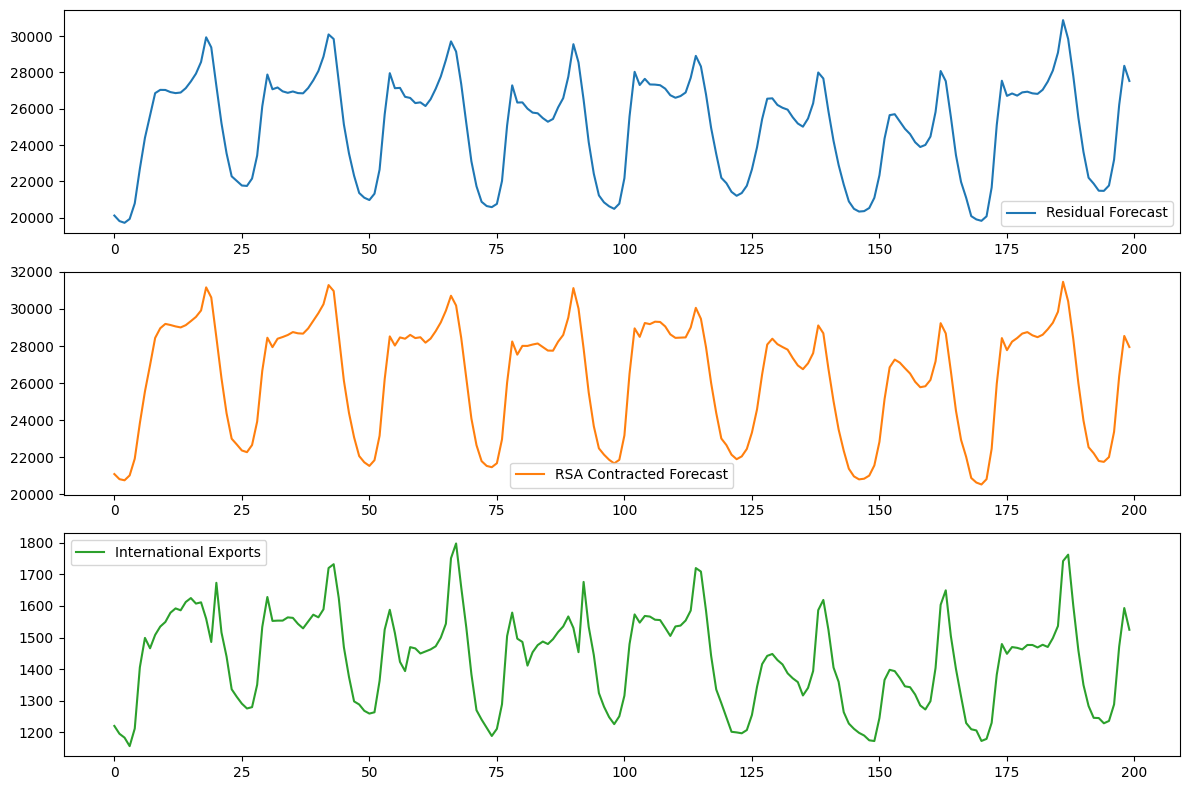

In [182]:
plot_cols = demand_columns

# Create a figure with a specific size
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = demand_data[plot_cols]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = demand_data[plot_cols][:200]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
plt.show()  # Display the plots

In [183]:
demand_summary = demand_data[demand_columns].describe()

# Print or display the summary
print(demand_summary)


       Residual Forecast  RSA Contracted Forecast  International Exports
count       33648.000000             33648.000000           33648.000000
mean        24240.668863             25837.151470            1555.356442
std          2961.587500              3272.992105             219.484734
min         14319.136000             15172.651000             587.054000
25%         21864.490750             22843.800750            1391.084250
50%         24540.081000             26561.748000            1537.438000
75%         26326.651500             28344.280750            1707.534500
max         34134.043000             35034.349000            2375.939000


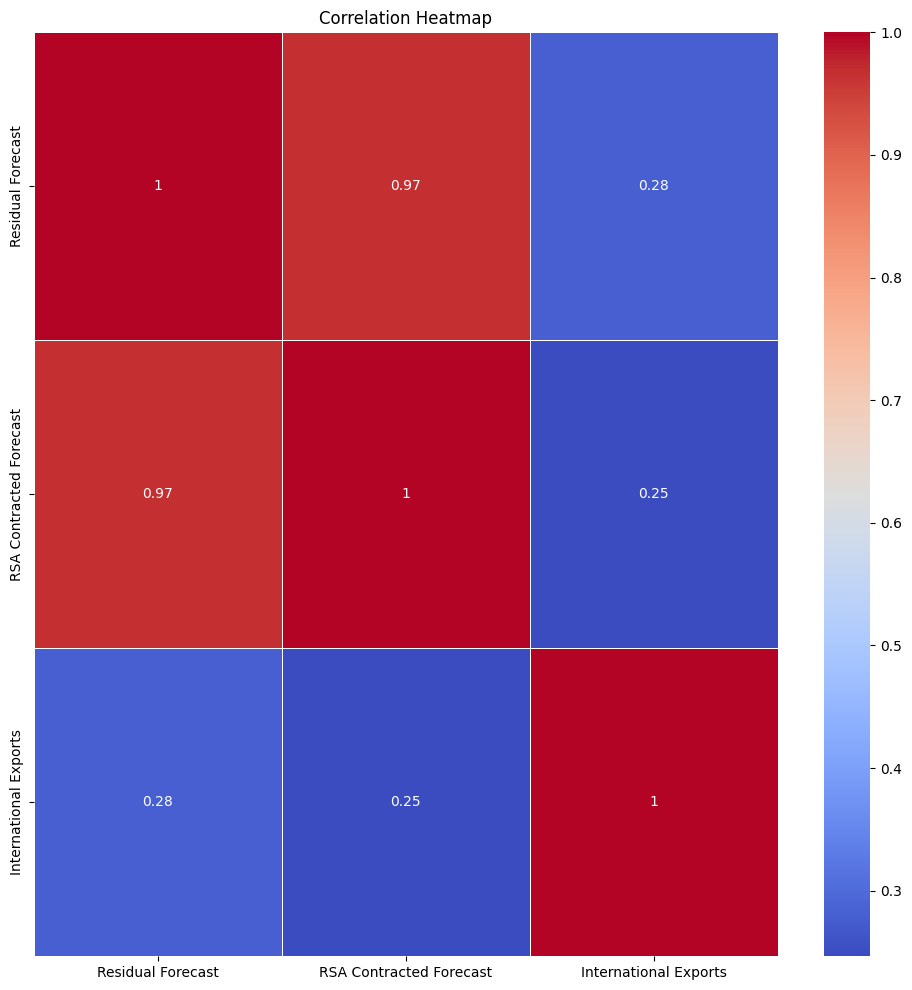

In [168]:
correlation_matrix = demand_data[demand_columns].corr()
plt.figure(figsize=(12, 12))  # Set the size of the heatmap

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")  # Set the title of the heatmap

plt.show()  # Display the heatmap

### Feature engineering Average forecast


In [218]:
demand_data['Average Forecast'] = (demand_data['RSA Contracted Forecast'] + demand_data['Residual Forecast'])/2
data.drop(['Residual Forecast', 'RSA Contracted Forecast'], axis=1, inplace=True)




/tmp/ipykernel_6074/3046278285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_data['Average Forecast'] = (demand_data['RSA Contracted Forecast'] + demand_data['Residual Forecast'])/2


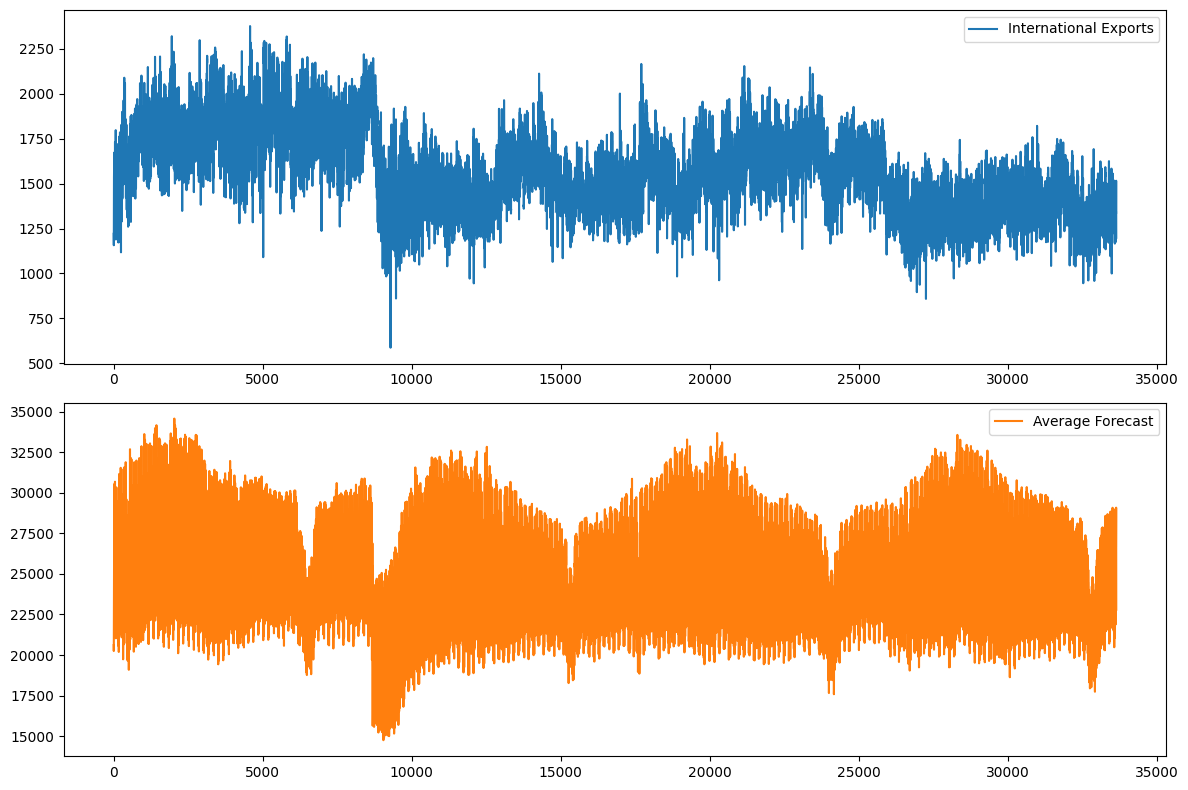

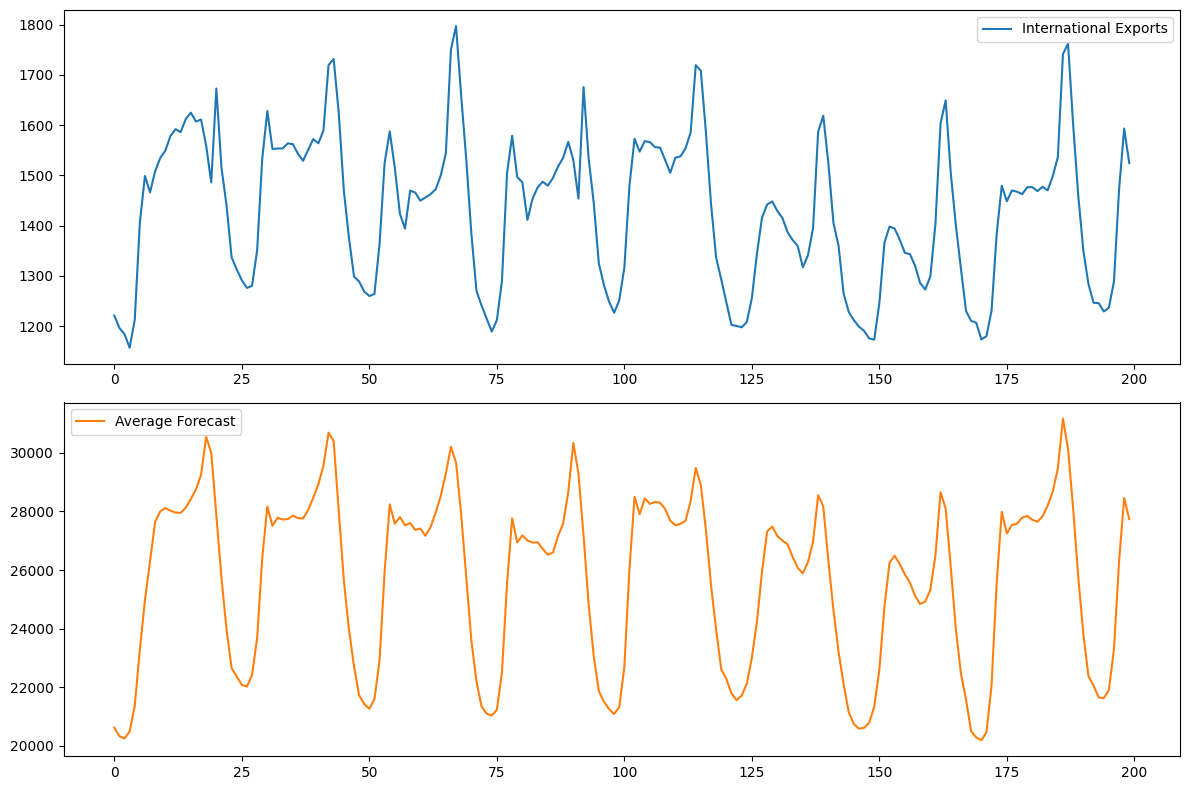

In [170]:
plot_cols = demand_data.columns

# Create a figure with a specific size
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = demand_data[plot_cols]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = demand_data[plot_cols][:200]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
plt.show()  # Display the plots

### Feature engineering Net demand

In [219]:
data['Net Demand'] = (demand_data['Average Forecast'] + data['International Exports'])
data.drop(['International Exports'], axis=1, inplace=True)

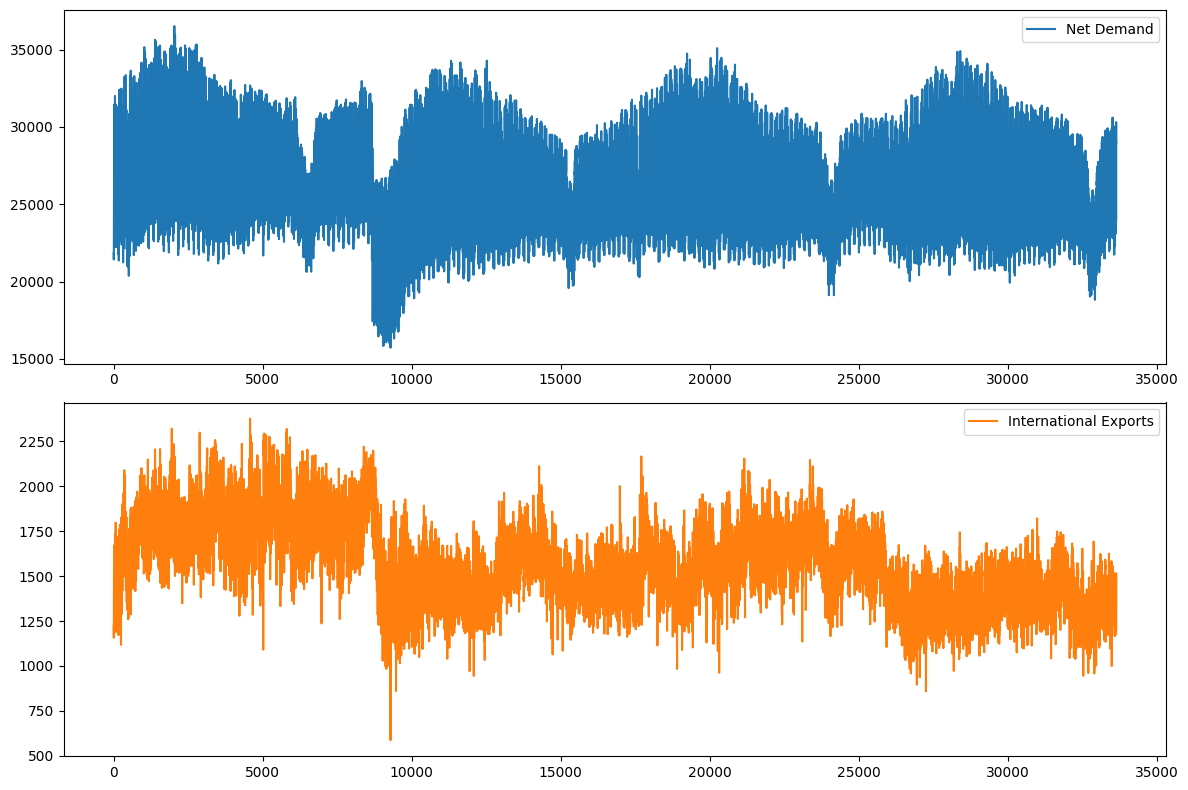

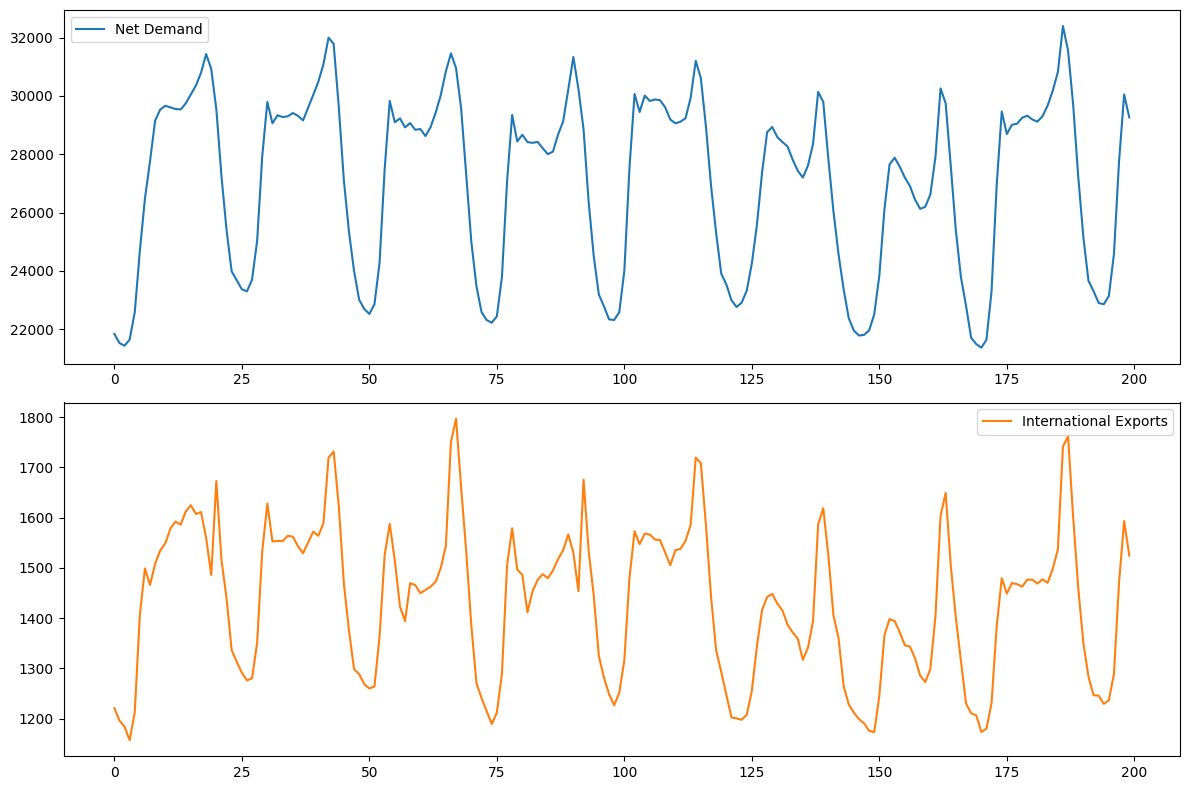

In [ ]:
plot_cols = ['Net Demand', 'International Exports']

# Create a figure with a specific size
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = data[plot_cols]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = data[plot_cols][:200]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
plt.show()  # Display the plots

## Supply Side analysing

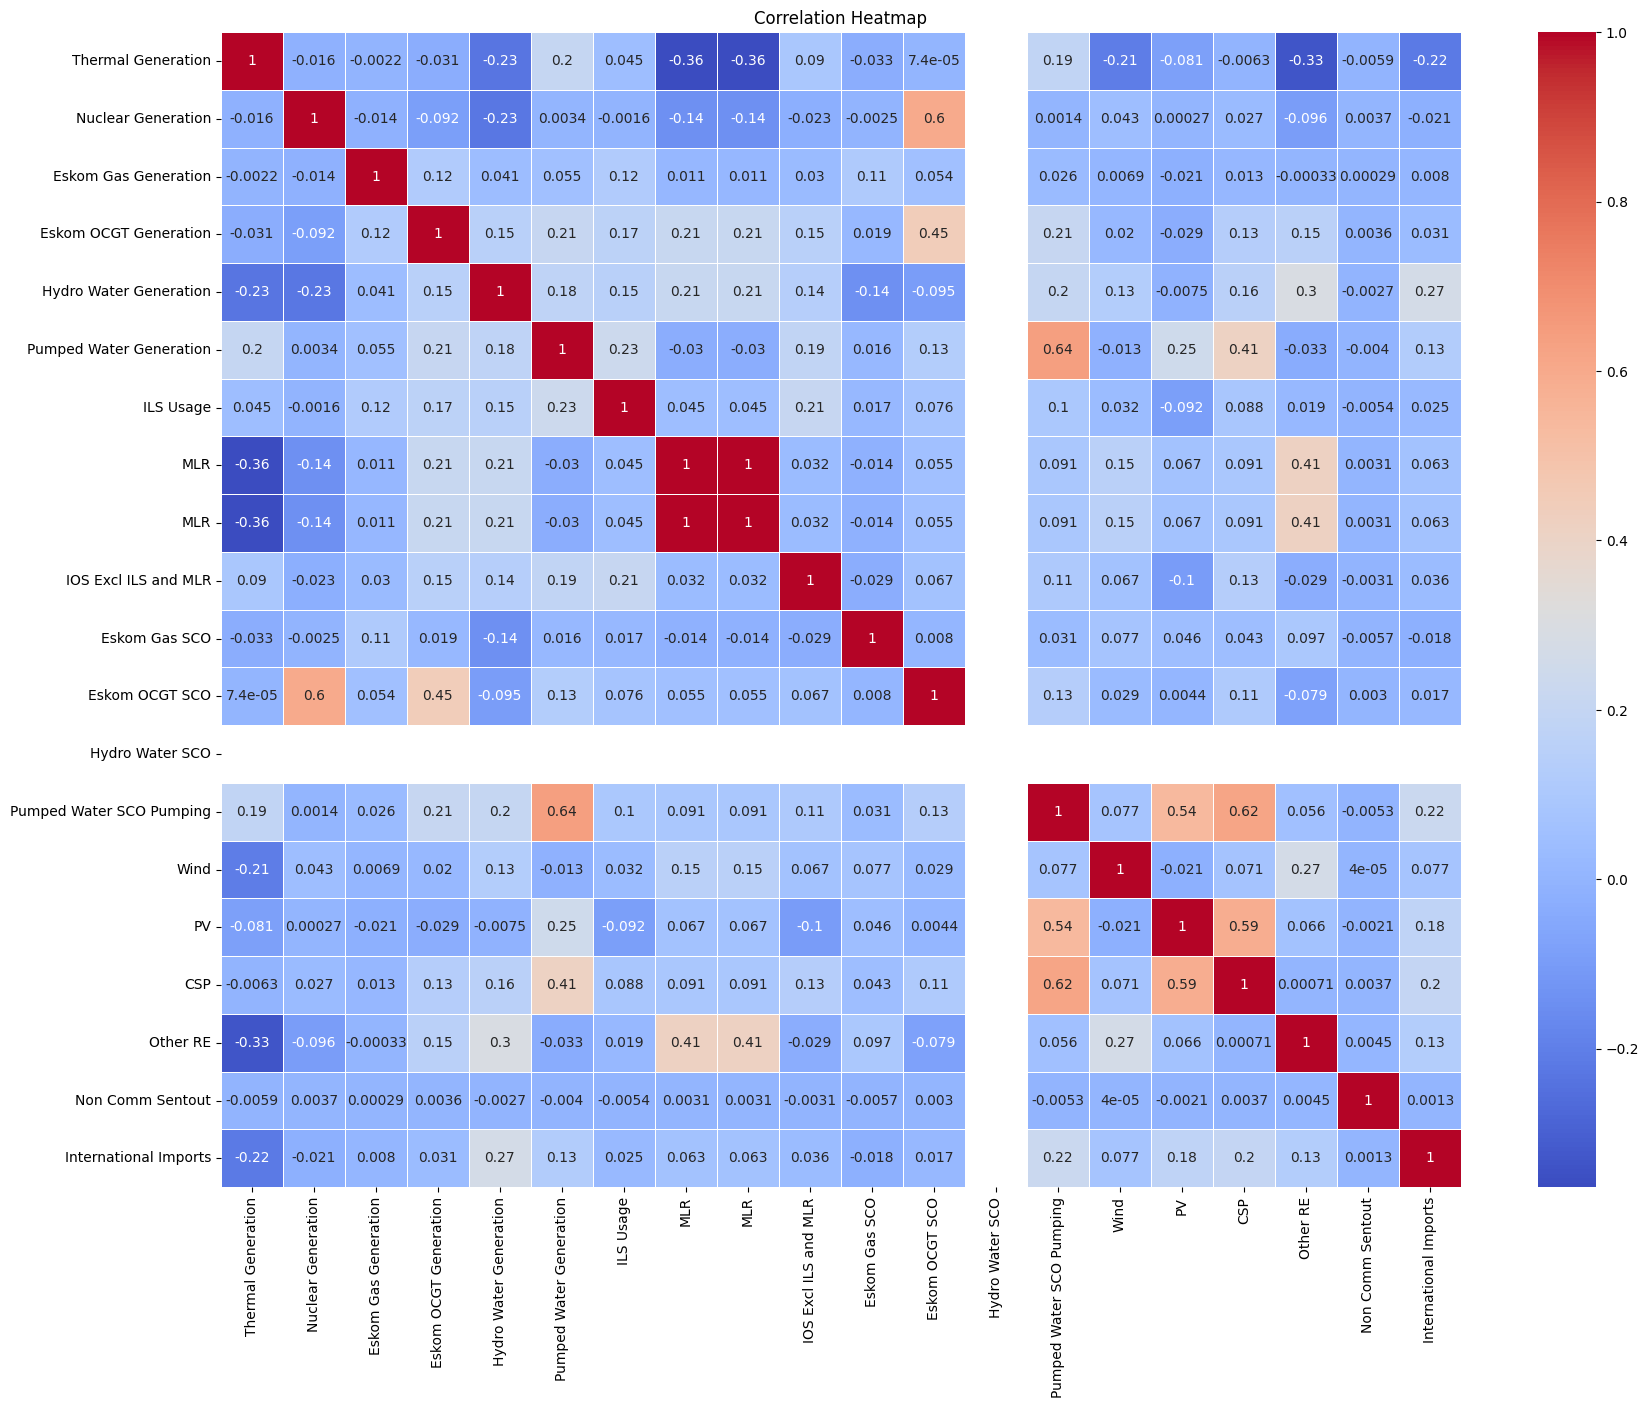

In [ ]:
correlation_matrix = supply_data.corr()
plt.figure(figsize=(20, 15))  # Set the size of the heatmap

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")  # Set the title of the heatmap

plt.show()  # Display the heatmap


### Feature engineering Supply side

In [220]:
data['Net impact OCGT usuage'] = data['Eskom OCGT Generation'] + data['Eskom OCGT SCO']
data['Nuclear net with OCGT'] = data['Nuclear Generation'] + data['Eskom OCGT SCO']
data['Net impact Pumped water'] = data['Pumped Water Generation'] + data['Pumped Water SCO Pumping']
data['Net impact Sun'] = (data['CSP'] + data['PV'])/2

data.drop(['Eskom OCGT Generation', 'Eskom OCGT SCO', 'Nuclear Generation', 'Pumped Water Generation', 'Pumped Water SCO Pumping', 'CSP', 'PV'], axis=1, inplace=True)


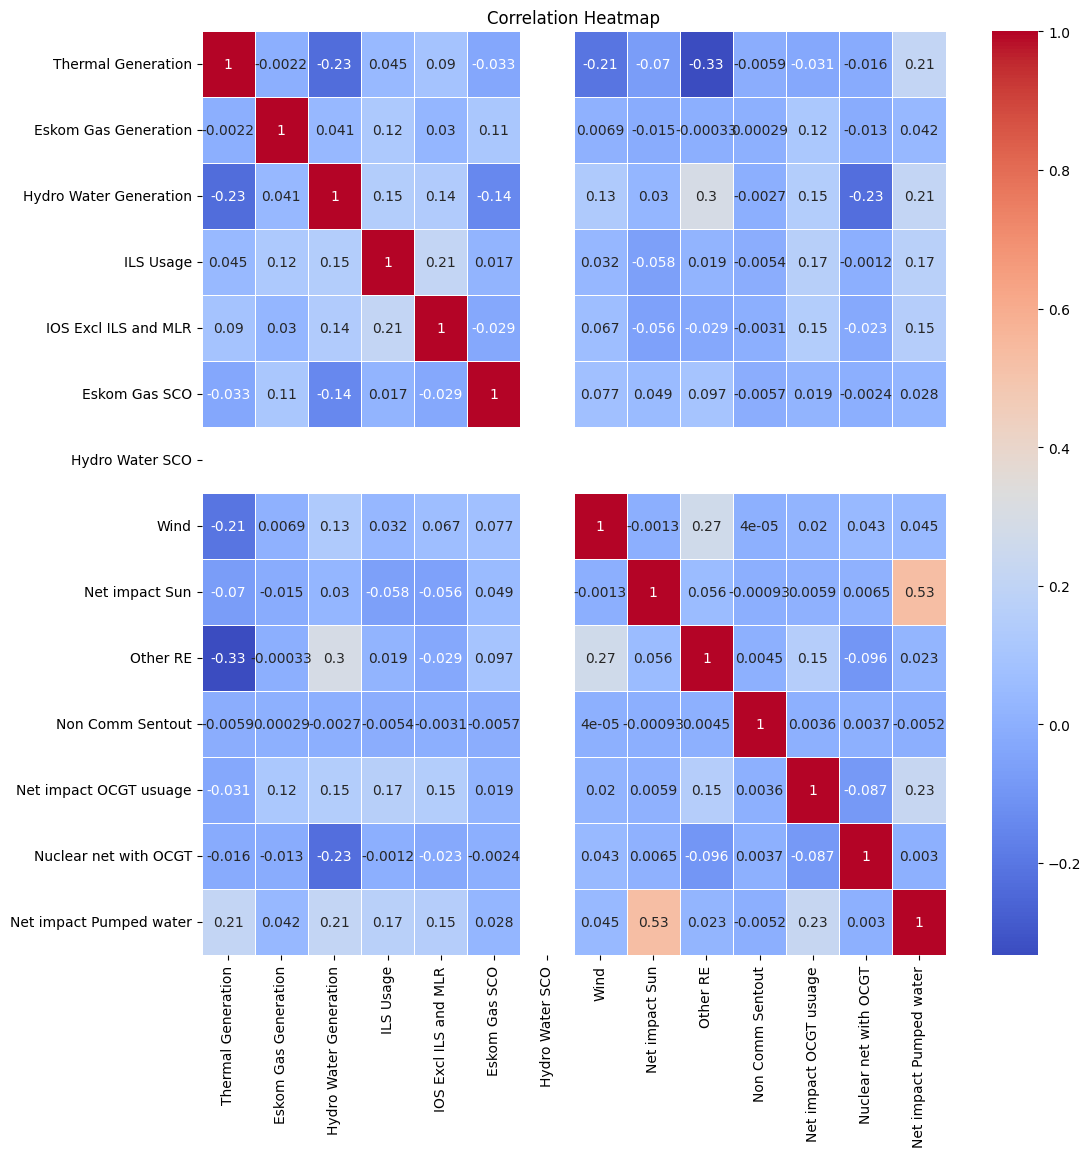

In [173]:
correlation_matrix = supply_data.corr()
plt.figure(figsize=(12, 12))  # Set the size of the heatmap

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")  # Set the title of the heatmap

plt.show()  # Display the heatmap

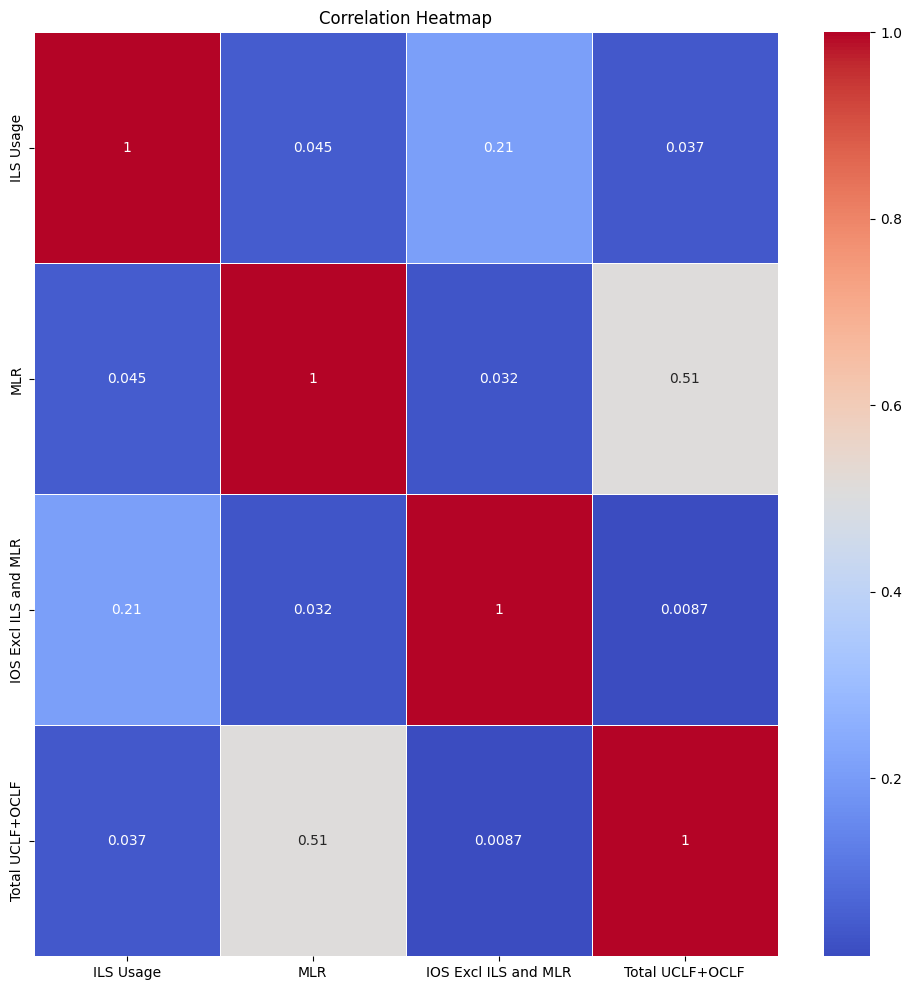

In [174]:
correlation_matrix = grid_health_data.corr()
plt.figure(figsize=(12, 12))  # Set the size of the heatmap

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")  # Set the title of the heatmap

plt.show()  # Display the heatmap

### Feature engineering Total Outage

In [221]:
data['Total Outage'] = data['MLR'] + data['Total UCLF+OCLF'] + data['ILS Usage'] + data['IOS Excl ILS and MLR']
grid_health_data['Total Outage'] = data['Total Outage']

data.drop(['ILS Usage', 'MLR', 'IOS Excl ILS and MLR', 'Total UCLF+OCLF'], axis=1, inplace=True)

/tmp/ipykernel_6074/1037163871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_health_data['Total Outage'] = data['Total Outage']


In [223]:
data.rename({'Date Time Hour Beginning': 'DateTime'}, axis=1, inplace=True)

In [224]:
data

,DateTime,International Imports,Thermal Generation,Eskom Gas Generation,Hydro Water Generation,Dispatchable IPP OCGT,Eskom Gas SCO,Hydro Water SCO,Wind,Other RE,Non Comm Sentout,Net Demand,Net impact OCGT usuage,Nuclear net with OCGT,Net impact Pumped water,Net impact Sun,Total Outage
0,2019-04-01 12:00:00 AM,919.0,19988.0,0.0,0.0,0.000,-2.0,0.0,746.888,12.890,125.0,21834.5535,-1.730,1843.270,-1713.0,0.0000,11595.000
1,2019-04-01 01:00:00 AM,834.0,19670.0,0.0,0.0,0.000,-2.0,0.0,937.058,13.055,279.0,21520.6875,-1.730,1843.270,-1797.0,0.0000,11428.000
2,2019-04-01 02:00:00 AM,765.0,19597.0,0.0,0.0,0.000,-2.0,0.0,982.304,13.462,1.0,21429.6915,-1.730,1843.270,-1790.0,0.0000,11269.000
3,2019-04-01 03:00:00 AM,739.0,19675.0,0.0,0.0,0.000,-2.0,0.0,980.428,12.930,95.0,21640.0120,-1.600,1843.400,-1779.0,0.0000,11199.000
4,2019-04-01 04:00:00 AM,926.0,19871.0,0.0,0.0,0.000,-2.0,0.0,1035.222,12.905,393.0,22573.7240,-1.730,1843.270,-1482.0,0.0000,11198.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33643,2023-01-31 07:00:00 PM,1266.0,17566.0,0.0,602.0,307.984,-2.0,0.0,1916.622,39.519,253.0,30604.1635,891.000,923.000,1129.0,163.3400,23205.781
33644,2023-01-31 08:00:00 PM,1252.0,17317.5,0.0,601.0,309.125,-2.0,0.0,2044.470,32.775,219.0,29681.6570,815.267,921.267,709.0,138.3725,23089.637
33645,2023-01-31 09:00:00 PM,1285.0,17183.0,0.0,496.0,117.113,-2.0,0.0,1754.167,40.904,749.0,27325.0335,467.667,919.667,-406.0,86.0765,23313.800
33646,2023-01-31 10:00:00 PM,1280.0,17101.0,0.0,333.0,0.000,-2.0,0.0,1362.100,39.957,619.0,25207.3655,364.401,919.401,-810.0,47.4035,22508.828


In [ ]:
csv_file_path = 'Final_eskom.csv'

# Export the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column